# Face Recognition  of The Mobile Scroller
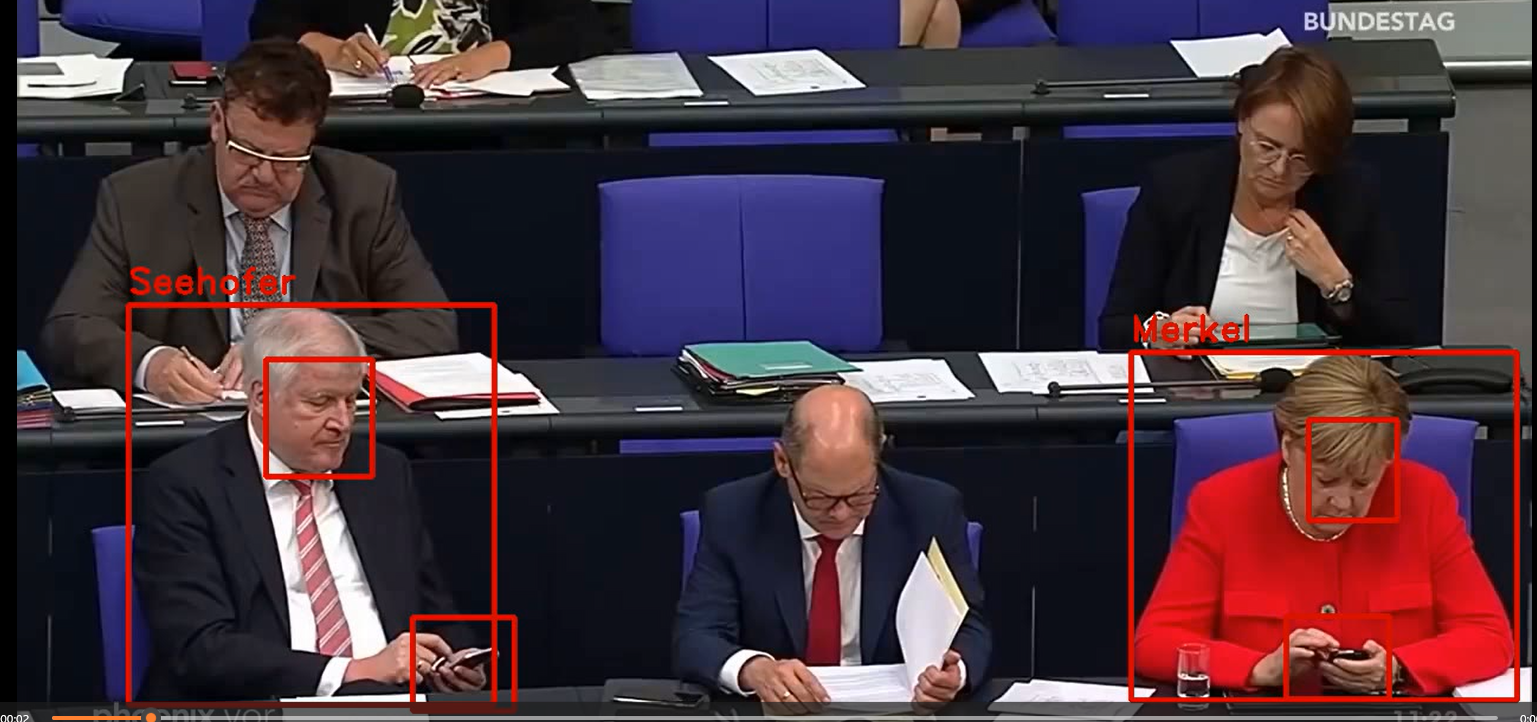

# Load Encoding Images

In [43]:
from simple_facerec import SimpleFacerec
sfr = SimpleFacerec()
sfr.load_encoding_images("images")

4 encoding images found.
Encoding images loaded


# Importing YOLO

In [17]:
from ultralytics import YOLO

# Creat Function to return the verfy name and location

In [9]:
import face_recognition
import numpy as np
def return_name(person_crop):
    rgb_small_frame = cv2.cvtColor(person_crop, cv2.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(rgb_small_frame)
    face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)
    matches = face_recognition.compare_faces(sfr.known_face_encodings, face_encodings[0])
    face_distances = face_recognition.face_distance(sfr.known_face_encodings, face_encodings[0])
    best_match_index = np.argmin(face_distances)
    name="Unknown"
    if matches[best_match_index]:
        name = sfr.known_face_names[best_match_index]
    return name , face_locations

# Train Yolo model

In [3]:
results = model.train(data='coco128.yaml', epochs=50, imgsz=640)

New https://pypi.org/project/ultralytics/8.0.190 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.188  Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12288MiB)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=coco128.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnosti

       7/50      13.4G      2.034      2.131      2.195         35        640: 100%|██████████| 22/22 [01:11<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<0
                   all         50         51      0.474      0.294      0.263     0.0985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/50      13.4G      1.925      2.071       2.08         36        640: 100%|██████████| 22/22 [01:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<0
                   all         50         51      0.256     0.0196    0.00576    0.00286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/50      13.4G      1.893      2.026      2.072         19        640: 100%|██████████| 22/22 [01:01<00:00,  2.
                 Class     Images  Instances      Box(P         


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      47/50      13.4G      1.171     0.6638      1.594         15        640: 100%|██████████| 22/22 [01:11<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<0
                   all         50         51      0.969      0.784      0.893      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      48/50      13.4G      1.128     0.6296      1.545         14        640: 100%|██████████| 22/22 [01:05<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<0
                   all         50         51      0.995      0.745      0.861      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      49/50      13.4G      1.133     0.6618      1.559         17        640: 100%|██████████| 22/22 [01

# The trained and pretrained model

In [18]:
mobil_model=YOLO("runs\\detect\\train12\\weights\\best.pt")
coco_model = YOLO("yolov8x-pose.pt")

In [51]:
import cv2
video_path = "vb.mp4"
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
ind=frame_width/frame_height
size = (frame_width, frame_height)
   
# Below VideoWriter object will create
# a frame of above defined The output 
# is stored in 'filename.avi' file.
result = cv2.VideoWriter('filename.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         20, size)
result = cv2.VideoWriter('filename.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         20, size)
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        mobil_results = mobil_model.track(frame, conf=0.56)
        coco_results=coco_model.track(frame)
        #"==========================="
        try:
            for mobil_detection in mobil_results[0].boxes.data.tolist():
                mx1, my1, mx2, my2, mclass_id,mscore,s = mobil_detection
                center=[(mx2+mx1)/2,(my2+my1)/2]
                for coco_detection in coco_results[0].boxes.data.tolist():
                    x1, y1, x2, y2, class_id ,score, s = coco_detection
                    nm=int(x1)/int(y1)
                    if x2 > center[0] > x1   and y2 > center[1] > y1 :
                        person_crop=frame[int(y1):int(y2), int(x1): int(x2), :]
                        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2),int(y2)), (0, 0, 200), 4)
                        cv2.rectangle(frame, (int(mx1), int(my1)), (int(mx2),int(my2)), (0, 0, 200), 4)



                        name,face_location = return_name(person_crop)
                        fx1,fy1,fx2,fy2=face_location[0]
                        print(name)

                        cv2.putText(frame, name,(int(x1), int(y1) - 10), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 200), 2)
                        cv2.rectangle(frame, (fx1+int(x1)+20, fy1+int(y1)-20), (fx2+int(x1)+20, fy2+int(y1)-20), (0, 0, 200), 4)
        except:
            pass
        #"==========================="

        # Visualize the results on the frame
        coco_annotated_frame=coco_results[0].plot()
        mobil_annotated_frame = mobil_results[0].plot()
        result.write(frame)

            # Display the annotated frame
        cv2.imshow("scrolling", frame)


        # Break the loop if 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
result.release()
cv2.destroyAllWindows()


0: 384x640 2 cellphones, 141.0ms
Speed: 8.0ms preprocess, 141.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 68.1ms
Speed: 2.0ms preprocess, 68.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 147.8ms
Speed: 1.0ms preprocess, 147.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 72.2ms
Speed: 2.0ms preprocess, 72.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 146.9ms
Speed: 2.0ms preprocess, 146.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 40.1ms
Speed: 2.0ms preprocess, 40.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 80.8ms
Speed: 2.0ms preprocess, 80.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 83.3ms
Speed: 2.0ms preprocess, 83.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 143.4ms
Speed: 2.0ms preprocess, 143.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 94.5ms
Speed: 2.0ms preprocess, 94.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 54.8ms
Speed: 1.4ms preprocess, 54.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 58.4ms
Speed: 1.5ms preprocess, 58.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 87.8ms
Speed: 2.1ms preprocess, 87.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 138.5ms
Speed: 1.0ms preprocess, 138.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 144.5ms
Speed: 3.1ms preprocess, 144.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 89.6ms
Speed: 2.0ms preprocess, 89.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 58.5ms


Sara


Speed: 1.0ms preprocess, 58.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 61.6ms
Speed: 1.0ms preprocess, 61.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 130.0ms
Speed: 2.0ms preprocess, 130.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 59.2ms
Speed: 2.0ms preprocess, 59.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 53.0ms
Speed: 2.0ms preprocess, 53.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 56.0ms
Speed: 1.0ms preprocess, 56.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 91.6ms
Speed: 3.0ms preprocess, 91.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 86.5ms
Speed: 2.0ms preprocess, 86.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 145.2ms
Speed: 2.0ms preprocess, 145.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 73.7ms
Speed: 2.0ms preprocess, 73.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 83.6ms
Speed: 2.1ms preprocess, 83.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 81.9ms
Speed: 2.0ms preprocess, 81.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 143.6ms
Speed: 2.0ms preprocess, 143.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 89.3ms
Speed: 2.0ms preprocess, 89.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 82.8ms
Speed: 2.0ms preprocess, 82.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 80.9ms
Speed: 2.0ms preprocess, 80.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 145.2ms
Speed: 2.0ms preprocess, 145.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 71.8ms
Speed: 2.0ms preprocess, 71.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 83.2ms
Speed: 1.0ms preprocess, 83.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 80.7ms
Speed: 1.0ms preprocess, 80.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 142.1ms
Speed: 2.0ms preprocess, 142.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 98.3ms
Speed: 2.0ms preprocess, 98.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cellphones, 13.1ms
Speed: 2.1ms preprocess, 13.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 4 persons, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 2 cellphones, 68.7ms
Speed: 3.0ms preprocess, 68.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 70.2ms
Speed: 4.0ms preprocess, 70.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 2 cellphones, 141.3ms
Speed: 3.0ms preprocess, 141.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 134.7ms
Speed: 1.0ms preprocess, 134.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 2 cellphones, 61.0ms
Speed: 2.0ms preprocess, 61.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 62.5ms
Speed: 2.0ms preprocess, 62.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 2 cellphones, 57.3ms
Speed: 2.0ms preprocess, 57.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 59.3ms
Speed: 1.0ms preprocess, 59.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cellphones, 16.2ms
Speed: 2.0ms preprocess, 16.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 4 persons, 17.1ms
Speed: 1.0ms preprocess, 17.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 2 cellphones, 76.3ms
Speed: 2.1ms preprocess, 76.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 78.1ms
Speed: 2.0ms preprocess, 78.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 2 cellphones, 144.6ms
Speed: 2.0ms preprocess, 144.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 134.5ms
Speed: 2.0ms preprocess, 134.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 61.8ms


Sara


Speed: 2.1ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 61.0ms
Speed: 2.0ms preprocess, 61.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 91.5ms
Speed: 2.0ms preprocess, 91.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 139.6ms
Speed: 2.0ms preprocess, 139.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 143.9ms
Speed: 3.0ms preprocess, 143.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 40.0ms
Speed: 2.1ms preprocess, 40.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 57.2ms
Speed: 1.0ms preprocess, 57.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 73.5ms
Speed: 2.0ms preprocess, 73.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 141.6ms
Speed: 2.0ms preprocess, 141.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 117.0ms
Speed: 2.0ms preprocess, 117.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 58.6ms


Sara


Speed: 1.0ms preprocess, 58.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 60.7ms
Speed: 1.0ms preprocess, 60.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 89.4ms
Speed: 2.0ms preprocess, 89.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 80.9ms
Speed: 1.0ms preprocess, 80.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 146.0ms
Speed: 2.0ms preprocess, 146.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 52.3ms
Speed: 2.0ms preprocess, 52.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown


Sara


0: 384x640 2 cellphones, 83.2ms
Speed: 2.0ms preprocess, 83.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 79.2ms
Speed: 2.0ms preprocess, 79.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 142.3ms
Speed: 3.1ms preprocess, 142.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 98.6ms
Speed: 2.0ms preprocess, 98.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 54.1ms
Speed: 2.0ms preprocess, 54.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 56.2ms
Speed: 1.0ms preprocess, 56.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 89.1ms
Speed: 2.5ms preprocess, 89.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 94.6ms
Speed: 2.0ms preprocess, 94.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 145.8ms
Speed: 2.7ms preprocess, 145.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 72.4ms
Speed: 1.1ms preprocess, 72.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 146.8ms
Speed: 2.0ms preprocess, 146.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 46.4ms
Speed: 2.1ms preprocess, 46.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 53.9ms
Speed: 2.0ms preprocess, 53.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 55.5ms
Speed: 2.0ms preprocess, 55.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 92.8ms
Speed: 2.0ms preprocess, 92.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 80.6ms
Speed: 1.0ms preprocess, 80.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 147.9ms
Speed: 2.0ms preprocess, 147.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 44.1ms
Speed: 2.0ms preprocess, 44.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 54.3ms
Speed: 2.0ms preprocess, 54.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 55.7ms
Speed: 1.1ms preprocess, 55.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 141.9ms
Speed: 2.3ms preprocess, 141.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 108.1ms
Speed: 2.0ms preprocess, 108.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cellphones, 13.1ms
Speed: 1.1ms preprocess, 13.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 4 persons, 13.6ms
Speed: 1.0ms preprocess, 13.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 2 cellphones, 68.3ms
Speed: 2.0ms preprocess, 68.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 70.8ms
Speed: 1.1ms preprocess, 70.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 145.8ms
Speed: 2.0ms preprocess, 145.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 71.2ms
Speed: 2.0ms preprocess, 71.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 53.5ms
Speed: 1.1ms preprocess, 53.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 56.1ms
Speed: 1.0ms preprocess, 56.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 93.3ms
Speed: 2.0ms preprocess, 93.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 83.8ms
Speed: 2.0ms preprocess, 83.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 145.7ms
Speed: 2.0ms preprocess, 145.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 88.3ms
Speed: 2.0ms preprocess, 88.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 54.0ms
Speed: 2.0ms preprocess, 54.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 55.6ms
Speed: 1.0ms preprocess, 55.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 89.7ms
Speed: 2.0ms preprocess, 89.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 94.8ms
Speed: 2.0ms preprocess, 94.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 143.7ms
Speed: 2.0ms preprocess, 143.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 102.1ms
Speed: 2.1ms preprocess, 102.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 53.0ms
Speed: 1.0ms preprocess, 53.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 56.1ms
Speed: 1.0ms preprocess, 56.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 92.3ms
Speed: 2.1ms preprocess, 92.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 86.8ms
Speed: 1.1ms preprocess, 86.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 143.9ms
Speed: 2.7ms preprocess, 143.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 78.2ms
Speed: 2.4ms preprocess, 78.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 146.6ms
Speed: 2.2ms preprocess, 146.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 51.0ms
Speed: 2.0ms preprocess, 51.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 49.6ms
Speed: 1.0ms preprocess, 49.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 51.0ms
Speed: 1.0ms preprocess, 51.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 91.0ms
Speed: 2.0ms preprocess, 91.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 87.4ms
Speed: 2.1ms preprocess, 87.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 144.8ms
Speed: 2.1ms preprocess, 144.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 110.2ms
Speed: 2.0ms preprocess, 110.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 51.0ms
Speed: 1.1ms preprocess, 51.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 52.3ms
Speed: 2.0ms preprocess, 52.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 88.0ms
Speed: 2.5ms preprocess, 88.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 85.2ms
Speed: 2.0ms preprocess, 85.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 145.4ms
Speed: 3.0ms preprocess, 145.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 71.4ms
Speed: 1.0ms preprocess, 71.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 145.3ms
Speed: 2.0ms preprocess, 145.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 134.4ms
Speed: 2.0ms preprocess, 134.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 50.3ms
Speed: 1.0ms preprocess, 50.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 53.5ms
Speed: 1.0ms preprocess, 53.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 1 cellphone, 91.7ms
Speed: 2.0ms preprocess, 91.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 78.3ms
Speed: 1.0ms preprocess, 78.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 133.8ms
Speed: 2.0ms preprocess, 133.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 69.5ms
Speed: 1.0ms preprocess, 69.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cellphone, 66.3ms


Unknown


Speed: 1.0ms preprocess, 66.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 66.8ms
Speed: 2.0ms preprocess, 66.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 141.0ms
Speed: 2.0ms preprocess, 141.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 72.0ms
Speed: 2.0ms preprocess, 72.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 66.9ms
Speed: 2.0ms preprocess, 66.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 69.6ms
Speed: 2.0ms preprocess, 69.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 2 cellphones, 142.2ms
Speed: 2.0ms preprocess, 142.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 134.5ms
Speed: 2.0ms preprocess, 134.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 61.9ms
Speed: 1.0ms preprocess, 61.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 64.4ms
Speed: 1.0ms preprocess, 64.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 91.2ms
Speed: 2.0ms preprocess, 91.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 84.4ms
Speed: 2.0ms preprocess, 84.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 144.8ms
Speed: 2.1ms preprocess, 144.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 40.8ms
Speed: 2.0ms preprocess, 40.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 83.6ms
Speed: 2.0ms preprocess, 83.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 85.7ms
Speed: 2.0ms preprocess, 85.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 143.0ms
Speed: 3.0ms preprocess, 143.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 123.7ms
Speed: 2.1ms preprocess, 123.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 1 cellphone, 58.6ms
Speed: 2.0ms preprocess, 58.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 64.5ms
Speed: 1.0ms preprocess, 64.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 2 cellphones, 93.7ms
Speed: 2.0ms preprocess, 93.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 84.9ms
Speed: 2.1ms preprocess, 84.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 1 cellphone, 145.2ms
Speed: 2.3ms preprocess, 145.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 51.0ms
Speed: 2.0ms preprocess, 51.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cellphones, 13.1ms
Speed: 1.1ms preprocess, 13.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 4 persons, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 144.0ms
Speed: 2.1ms preprocess, 144.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 66.1ms
Speed: 1.6ms preprocess, 66.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 58.5ms
Speed: 2.0ms preprocess, 58.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 60.5ms
Speed: 2.0ms preprocess, 60.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 145.3ms
Speed: 5.0ms preprocess, 145.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 78.7ms
Speed: 1.0ms preprocess, 78.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 144.0ms
Speed: 2.0ms preprocess, 144.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 36.1ms
Speed: 2.0ms preprocess, 36.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 83.9ms
Speed: 1.0ms preprocess, 83.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 87.0ms
Speed: 1.0ms preprocess, 87.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 145.1ms
Speed: 2.7ms preprocess, 145.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 136.1ms
Speed: 2.0ms preprocess, 136.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 61.8ms
Speed: 2.0ms preprocess, 61.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 64.7ms
Speed: 1.0ms preprocess, 64.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 89.3ms
Speed: 2.1ms preprocess, 89.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 85.8ms
Speed: 1.0ms preprocess, 85.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 145.0ms
Speed: 2.0ms preprocess, 145.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 69.7ms
Speed: 2.0ms preprocess, 69.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 44.2ms
Speed: 2.0ms preprocess, 44.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 46.1ms
Speed: 1.0ms preprocess, 46.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 67.9ms
Speed: 2.0ms preprocess, 67.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 81.8ms
Speed: 2.1ms preprocess, 81.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 145.9ms
Speed: 2.2ms preprocess, 145.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 58.7ms
Speed: 1.0ms preprocess, 58.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 14.1ms
Speed: 1.0ms preprocess, 14.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 13.1ms
Speed: 1.0ms preprocess, 13.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 14.1ms
Speed: 1.0ms preprocess, 14.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 34.3ms
Speed: 1.0ms preprocess, 34.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 35.1ms
Speed: 1.0ms preprocess, 35.1ms inference, 0.1ms postprocess per im


0: 384x640 3 cellphones, 62.6ms
Speed: 2.1ms preprocess, 62.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 63.6ms
Speed: 2.0ms preprocess, 63.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 56.6ms
Speed: 2.0ms preprocess, 56.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 58.2ms
Speed: 2.0ms preprocess, 58.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 63.7ms
Speed: 2.1ms preprocess, 63.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 66.7ms
Speed: 1.0ms preprocess, 66.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 59.2ms
Speed: 2.0ms preprocess, 59.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 60.1ms
Speed: 1.0ms preprocess, 60.1ms inference, 1.0ms postprocess per imag

Unknown



0: 384x640 3 cellphones, 131.2ms
Speed: 2.0ms preprocess, 131.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 63.7ms
Speed: 1.0ms preprocess, 63.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 61.7ms
Speed: 2.0ms preprocess, 61.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 63.6ms
Speed: 2.0ms preprocess, 63.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 62.7ms
Speed: 2.1ms preprocess, 62.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 63.5ms
Speed: 2.0ms preprocess, 63.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 138.9ms
Speed: 2.0ms preprocess, 138.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 67.5ms
Speed: 2.0ms preprocess, 67.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 66.7ms
Speed: 2.0ms preprocess, 66.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 68.8ms
Speed: 1.0ms preprocess, 68.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 59.2ms
Speed: 1.0ms preprocess, 59.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 59.8ms
Speed: 2.0ms preprocess, 59.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 58.5ms
Speed: 2.0ms preprocess, 58.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 59.5ms
Speed: 2.0ms preprocess, 59.5ms inference, 1.0ms postprocess per im

Unknown



0: 384x640 3 cellphones, 18.0ms
Speed: 1.0ms preprocess, 18.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 18.5ms
Speed: 1.0ms preprocess, 18.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 63.2ms
Speed: 2.0ms preprocess, 63.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 66.0ms
Speed: 4.0ms preprocess, 66.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 76.0ms
Speed: 2.0ms preprocess, 76.0ms inference, 0.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 133.4ms
Speed: 2.1ms preprocess, 133.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 65.5ms
Speed: 1.0ms preprocess, 65.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 69.0ms
Speed: 2.0ms preprocess, 69.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 71.2ms
Speed: 1.1ms preprocess, 71.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 68.8ms
Speed: 2.0ms preprocess, 68.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 71.2ms
Speed: 1.0ms preprocess, 71.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 96.2ms
Speed: 2.0ms preprocess, 96.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 98.4ms
Speed: 1.1ms preprocess, 98.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 73.1ms
Speed: 2.0ms preprocess, 73.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 75.9ms
Speed: 1.0ms preprocess, 75.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 144.9ms
Speed: 3.0ms preprocess, 144.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 68.7ms
Speed: 2.0ms preprocess, 68.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 145.3ms
Speed: 2.0ms preprocess, 145.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 121.9ms
Speed: 2.0ms preprocess, 121.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 13.1ms
Speed: 2.1ms preprocess, 13.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 30.1ms
Speed: 1.0ms preprocess, 30.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 33.1ms
Speed: 1.0ms preprocess, 33.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 65.1ms
Speed: 1.0ms preprocess, 65.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 71.5ms
Speed: 2.0ms preprocess, 71.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 146.6ms
Speed: 2.0ms preprocess, 146.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 134.3ms
Speed: 2.0ms preprocess, 134.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 45.8ms
Speed: 2.0ms preprocess, 45.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 48.9ms
Speed: 1.0ms preprocess, 48.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 86.0ms
Speed: 2.0ms preprocess, 86.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 87.5ms
Speed: 2.1ms preprocess, 87.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 46.1ms
Speed: 2.0ms preprocess, 46.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 47.8ms
Speed: 1.0ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 90.6ms
Speed: 2.0ms preprocess, 90.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 83.1ms
Speed: 2.0ms preprocess, 83.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 144.4ms
Speed: 2.0ms preprocess, 144.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 131.2ms
Speed: 2.1ms preprocess, 131.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 46.0ms
Speed: 2.5ms preprocess, 46.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 46.7ms
Speed: 1.0ms preprocess, 46.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 62.6ms
Speed: 1.0ms preprocess, 62.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 64.7ms
Speed: 1.0ms preprocess, 64.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 118.2ms
Speed: 2.1ms preprocess, 118.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 102.0ms
Speed: 1.0ms preprocess, 102.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 45.9ms
Speed: 1.0ms preprocess, 45.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 47.6ms
Speed: 1.0ms preprocess, 47.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 91.8ms
Speed: 2.0ms preprocess, 91.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 79.8ms
Speed: 2.0ms preprocess, 79.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 143.7ms
Speed: 2.1ms preprocess, 143.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 53.1ms
Speed: 2.1ms preprocess, 53.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 46.3ms
Speed: 2.0ms preprocess, 46.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 49.6ms
Speed: 1.0ms preprocess, 49.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 89.1ms
Speed: 2.0ms preprocess, 89.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 92.0ms
Speed: 2.0ms preprocess, 92.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 144.9ms
Speed: 3.1ms preprocess, 144.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 71.9ms
Speed: 2.0ms preprocess, 71.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 144.4ms
Speed: 2.5ms preprocess, 144.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 39.9ms
Speed: 2.0ms preprocess, 39.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 44.2ms
Speed: 2.1ms preprocess, 44.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 47.7ms
Speed: 1.0ms preprocess, 47.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 89.6ms
Speed: 2.0ms preprocess, 89.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 80.4ms
Speed: 2.1ms preprocess, 80.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 147.4ms
Speed: 2.1ms preprocess, 147.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 72.2ms
Speed: 1.0ms preprocess, 72.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 144.6ms
Speed: 2.1ms preprocess, 144.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 77.7ms
Speed: 2.1ms preprocess, 77.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 45.9ms
Speed: 2.2ms preprocess, 45.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 47.1ms
Speed: 1.0ms preprocess, 47.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cellphones, 83.3ms
Speed: 2.0ms preprocess, 83.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 82.4ms
Speed: 1.0ms preprocess, 82.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 136.0ms
Speed: 2.1ms preprocess, 136.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 93.3ms
Speed: 2.0ms preprocess, 93.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 45.3ms
Speed: 2.1ms preprocess, 45.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 47.6ms
Speed: 1.0ms preprocess, 47.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cellphones, 35.0ms
Speed: 2.1ms preprocess, 35.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 4 persons, 36.9ms
Speed: 1.1ms preprocess, 36.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 91.0ms
Speed: 2.0ms preprocess, 91.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 97.0ms
Speed: 1.0ms preprocess, 97.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 72.7ms
Speed: 2.0ms preprocess, 72.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 74.4ms
Speed: 2.0ms preprocess, 74.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 146.6ms
Speed: 2.0ms preprocess, 146.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 69.3ms
Speed: 2.0ms preprocess, 69.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 146.0ms
Speed: 2.0ms preprocess, 146.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 75.6ms
Speed: 2.0ms preprocess, 75.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 43.9ms
Speed: 2.0ms preprocess, 43.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 46.7ms
Speed: 1.0ms preprocess, 46.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 66.1ms
Speed: 2.0ms preprocess, 66.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 71.5ms
Speed: 2.0ms preprocess, 71.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 70.5ms
Speed: 2.0ms preprocess, 70.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 72.8ms
Speed: 1.0ms preprocess, 72.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 144.0ms
Speed: 2.3ms preprocess, 144.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 70.5ms
Speed: 2.0ms preprocess, 70.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 1 cellphone, 147.0ms
Speed: 4.0ms preprocess, 147.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 71.5ms
Speed: 1.0ms preprocess, 71.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 68.8ms
Speed: 2.0ms preprocess, 68.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 71.7ms
Speed: 1.0ms preprocess, 71.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 68.7ms
Speed: 2.0ms preprocess, 68.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 71.2ms
Speed: 2.0ms preprocess, 71.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 138.3ms
Speed: 2.0ms preprocess, 138.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 102.5ms
Speed: 1.0ms preprocess, 102.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cellphones, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 4 persons, 13.2ms
Speed: 1.0ms preprocess, 13.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 66.8ms
Speed: 1.1ms preprocess, 66.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 66.6ms
Speed: 2.0ms preprocess, 66.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 62.9ms
Speed: 2.0ms preprocess, 62.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 64.5ms
Speed: 2.1ms preprocess, 64.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 56.1ms
Speed: 2.1ms preprocess, 56.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 57.9ms
Speed: 1.0ms preprocess, 57.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 16.1ms
Speed: 1.1ms preprocess, 16.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 16.2ms
Speed: 2.5ms preprocess, 16.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 68.1ms
Speed: 1.1ms preprocess, 68.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 69.9ms
Speed: 1.0ms preprocess, 69.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 143.4ms
Speed: 2.0ms preprocess, 143.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 79.4ms
Speed: 2.0ms preprocess, 79.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 13.2ms
Speed: 1.0ms preprocess, 13.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 69.1ms
Speed: 3.1ms preprocess, 69.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 70.8ms
Speed: 1.0ms preprocess, 70.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 146.7ms
Speed: 2.1ms preprocess, 146.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 76.3ms
Speed: 2.1ms preprocess, 76.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 70.1ms
Speed: 1.0ms preprocess, 70.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 71.2ms
Speed: 1.0ms preprocess, 71.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 3 cellphones, 144.5ms
Speed: 2.0ms preprocess, 144.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 104.2ms
Speed: 2.1ms preprocess, 104.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 62.0ms
Speed: 2.1ms preprocess, 62.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 64.7ms
Speed: 1.0ms preprocess, 64.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cellphones, 56.6ms
Speed: 2.0ms preprocess, 56.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 57.5ms
Speed: 2.0ms preprocess, 57.5ms inference, 1.1ms postprocess per 

Unknown



0: 384x640 1 cellphone, 140.5ms
Speed: 2.0ms preprocess, 140.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 133.4ms
Speed: 2.0ms preprocess, 133.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cellphone, 12.9ms
Speed: 2.1ms preprocess, 12.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 3 persons, 13.1ms
Speed: 2.1ms preprocess, 13.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cellphone, 40.1ms


Unknown


Speed: 1.0ms preprocess, 40.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 43.0ms
Speed: 2.0ms preprocess, 43.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 65.5ms
Speed: 1.0ms preprocess, 65.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 61.5ms
Speed: 2.0ms preprocess, 61.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 77.3ms
Speed: 2.0ms preprocess, 77.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 80.8ms
Speed: 1.0ms preprocess, 80.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 66.7ms
Speed: 1.0ms preprocess, 66.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 67.5ms
Speed: 2.1ms preprocess, 67.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 136.0ms
Speed: 2.0ms preprocess, 136.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 66.2ms
Speed: 2.0ms preprocess, 66.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 64.7ms
Speed: 2.0ms preprocess, 64.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 65.1ms
Speed: 2.0ms preprocess, 65.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cellphone, 60.5ms


Unknown


Speed: 2.0ms preprocess, 60.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 62.3ms
Speed: 1.0ms preprocess, 62.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cellphone, 58.1ms


Unknown


Speed: 1.1ms preprocess, 58.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 59.2ms
Speed: 2.0ms preprocess, 59.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 65.8ms
Speed: 1.0ms preprocess, 65.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 67.7ms
Speed: 1.0ms preprocess, 67.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 59.2ms
Speed: 1.0ms preprocess, 59.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 60.7ms
Speed: 1.0ms preprocess, 60.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 1 cellphone, 68.4ms
Speed: 2.1ms preprocess, 68.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 71.4ms
Speed: 2.0ms preprocess, 71.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cellphone, 59.3ms


Unknown


Speed: 2.0ms preprocess, 59.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 60.5ms
Speed: 1.0ms preprocess, 60.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Unknown


0: 384x640 2 cellphones, 70.7ms
Speed: 2.0ms preprocess, 70.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 71.5ms
Speed: 1.1ms preprocess, 71.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 145.8ms
Speed: 2.0ms preprocess, 145.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 61.7ms
Speed: 2.0ms preprocess, 61.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 54.3ms
Speed: 1.0ms preprocess, 54.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 58.7ms
Speed: 1.0ms preprocess, 58.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 89.9ms
Speed: 2.0ms preprocess, 89.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 85.9ms
Speed: 1.0ms preprocess, 85.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 145.9ms
Speed: 2.1ms preprocess, 145.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 59.8ms
Speed: 2.0ms preprocess, 59.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 79.3ms
Speed: 1.0ms preprocess, 79.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 80.1ms
Speed: 1.0ms preprocess, 80.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 146.4ms
Speed: 2.0ms preprocess, 146.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 73.5ms
Speed: 1.0ms preprocess, 73.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 145.8ms
Speed: 2.0ms preprocess, 145.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 70.8ms
Speed: 2.0ms preprocess, 70.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 146.5ms
Speed: 2.0ms preprocess, 146.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 72.0ms
Speed: 1.0ms preprocess, 72.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown



0: 384x640 2 cellphones, 145.5ms
Speed: 2.1ms preprocess, 145.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 71.8ms
Speed: 1.1ms preprocess, 71.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Unknown
